In [88]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

# Parte 1 - Leitura dos datasets e prepação dos dataframes para a análise dos dados

## Leitura dos datasets

In [166]:
df_mat = pd.read_csv('student-mat.csv', sep = ';');
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [155]:
df_por = pd.read_csv('student-por.csv', sep = ';');
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [91]:
df = pd.merge(df_mat, df_por, how = 'inner', on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']);
df

In [92]:
df.rename(columns={
    'guardian_x': 'guardian_mat',
    'traveltime_x': 'traveltime_mat',
    'studytime_x': 'studytime_mat',
    'failures_x': 'failures_mat',
    'shcoolsup_x': 'schoolsup_mat',
    'famsup_x': 'famsup_mat',
    'paid_x': 'paid_mat',
    'activities_x': 'activities_mat',
    'higher_x': 'higher_mat',
    'romantic_x': 'romantic_mat',
    'famrel_x': 'famrel_mat',
    'freetime_x': 'freetime_mat',
    'gooyt_x': 'goout_mat',
    'Dalc_x': 'Dalc_mat',
    'Walc_x': 'Walc_mat',
    'health_x': 'health_mat',
    'absences_x': 'absences_mat',
    'G1_x': 'G1_mat',
    'G2_x': 'G2_mat',
    'G3_x': 'G3_mat',
    'guardian_y': 'guardian_por',
    'traveltime_y': 'traveltime_por',
    'studytime_y': 'studytime_por',
    'failures_y': 'failures_por',
    'shcoolsup_y': 'schoolsup_por',
    'famsup_y': 'famsup_por',
    'paid_y': 'paid_por',
    'activities_y': 'activities_por',
    'higher_y': 'higher_por',
    'romantic_y': 'romantic_por',
    'famrel_y': 'famrel_por',
    'freetime_y': 'freetime_por',
    'gooyt_y': 'goout_por',
    'Dalc_y': 'Dalc_por',
    'Walc_y': 'Walc_por',
    'health_y': 'health_por',
    'absences_y': 'absences_por',
    'G1_y': 'G1_por',
    'G2_y': 'G2_por',
    'G3_y': 'G3_por'
}, inplace = True);
df.head();

## Definição da média final

In [93]:
df['GF'] = (df['G1_mat'] + df['G2_mat'] + df['G3_mat'] + df['G1_por'] + df['G2_por'] + df['G3_por'])/6;
df

# Parte 2 - Obtenção de informações gerais a respeito das médias finais

## Resumo dos dados

O método describe() da biblioteca Pandas nos permite ter um resumo estatísticos dos d1ados de uma forma rápida, facilitando a análise dos dados e economizando tempo. Abaixo aplicamos esse método ao dataframe em análise:

In [151]:
df.describe()

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_x,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_y,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,10.861257,10.712042,10.387435,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707,11.471204
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,3.349167,3.832560,4.687242,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438,2.818131
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.250000,8.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000,9.500000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.500000,11.000000,11.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000,11.333333
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.333333


Embora esse método tenha retornado medidas que não fazem sentido para as variáveis qualitativas, podemos ignorá-las e considerar apenas as variáveis quantitavias em nossa análise 

Podemos extrair diversos dados do resumo estatístico, dentre eles (arrendodados para duas casas decimais): <br><br>
- A média das  idades dos alunos é 16.59
- O aluno mais novo tem 15 anos
- O aluno mais velho tem 22 anos
- O tempo médio que os alunos gastam estudando Português é em tornod e 2 a 5 horas (porque a média é 2.039267 - entre 2 e 3)

Dados que são interessantes para análise e que podemos extrair do resumo dizem respeito às médias finais dos alunos. Observando esses dados (arrendondados para duas casas decimais), temos: <br><br>
- A média das médias é 11.47
- A mediana das médias (segundo quartil) é 11.33
- O terceiro quartil das médias é 13.33
- A menor média é 4
- A maior média é 18.33

O fato da mediana (segundo quartil) ser 11.3, indica que pelo menos 50% dos alunos obteve média acima de 11.3 e que 50% dos alunos obteve média acima de 11.3. <br><br>
O fato do terceiro quartil ser 13.33 indica que pelo menos 75% dos alunos obteve nota acima de 13.33, ao passo que pelo menos 25% dos alunos obteve nota acima de 13.33. <br><br>

## Identificação de <i>outliers</i>

O resumo estatístico retornado pelo método describe(), no entanto, não deixa explícito se exitem no conjunto das nas médias dos alunos valores que são discrepantes dos demais, isso é, se existem <i>outliers</i>. <br><br>
Identificar os valores discrepantes é importante para que possamos ter uma análise mais acurada dos dados, visto que eles causam efeitos indesejáveis e colaterais nas análises, sobretudo por conta da média ser sensível a esses valores. Desta forma, se identificarmos outliers, devemos tratá-los a fim de obter uma análise mais fidefigna de nossos dados.

Um método rápido e explícito de observar se existem outliers em nosso conjunto de dados é gerar o diagrama de caixa, o boxplot, para o conjunto de dados. Abaixo é gerado o boxplot para as médias finais dos alunos

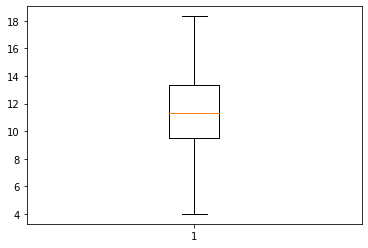

In [95]:
plt.boxplot(df['GF']);

O diagrama gerado mostra que não existem outliers nas médias finais dos alunos e corrobora com o resumo estatístico dos dados no que diz respeito ao primeiro quartil, à mediana, ao terceiro quartil, ao menor valor das médias finais e o maior valor das médias finais.

A fim de computar em variáveis os valores de cada uma dessas medidas para que possam ser usadas futuramente, podemos criar variáveis para cada uma delas:

### Média das médias finais



In [96]:
media_gf = np.mean(df['GF']);
media_gf

11.471204188481675

In [97]:
mediana_gf = np.median(df['GF']);
print(mediana_gf);

11.333333333333334


### Primeiro quartil das médias finais

In [98]:
q1_gf = df['GF'].quantile(0.25);
print(q1_gf);

9.5


### Terceiro quartil das médias finais

In [99]:
q3_gf = df['GF'].quantile(0.75);
print(q3_gf);

13.333333333333334


### Menor média final

In [100]:
menor_media_gf = np.min(df['GF']);
print(menor_media_gf);

4.0


### Maior média final

In [101]:
maior_media_gf = np.max(df['GF']);
print(maior_media_gf);

18.333333333333332


## Histograma das médias finais, assimetria e curtose

A fim de analisarmos a distribuição de frequências das médias finais e suas características, plotamos o histograma para essa variável:

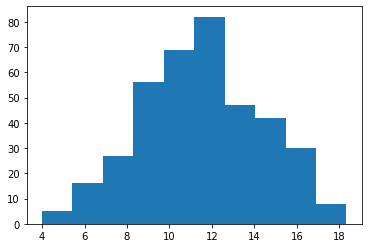

In [102]:
plt.hist(df['GF']);

A partir do histograma podemos ver que uma grande parte dos alunos (mais de 80) obtiveram médias finais entre 10 e 12. <br>
O histograma também sugere que a distribuição é levemente assimétrica à direita, pois mais médias finais **estão concentrados nos menores valores**.

## Cáculo do Coeficiente de Assimetria de Bowley

Para constatar ou refutar a assimetria que inferimos do histograma, podemos aplicar a fórmula do Coeficiente de Assimetria de Bowley às médias finais.

A Assimetria de Bowley é dada por: <br>
## <center>$ A_{b} = \frac{q_{1} + q_{3} - 2*md}{q_{3} - q+{1}}  $</center>

Onde:
- $q_{1}$ é o primeiro quartil
- $q_{3}$ é o terceiro quartil
- $md$ é a mediana

E:
- Se $ A_{b} = 0 $, a distribuição é simétrica
- Se $ A_{b} < 0 $, a distribuição é assimétrica negativa (com assimetria à esquerda)
- Se $ A_{b} > 0 $, a distribuição é assimétrica positiva (com assimetria à direita) 

In [103]:
assimetria_bowley = (q1_gf + q3_gf - 2*(mediana_gf))/(q3_gf - q1_gf)
print(assimetria_bowley)

0.04347826086956552


De fato, a distribuição apresenta uma assimetria à direita, pois o coeficiente de assimetria de Bowley resultou em 0.04347826086956552, um número positivo.

Também poderíamos inferir a assimetria pelos valores da média e da mediana das médias finais:

In [104]:
print(media_gf)

11.471204188481675


In [105]:
print(mediana_gf)

11.333333333333334


Como a média é maior que a mediana, naturalmente temos uma distribuição assimétrica à direita, com uma concentração nos menores valores.

Isso indica que a maioria dos alunos obteve uma nota baixo da média.

## Cálculo do Coeficiente Percentílico de Curtose

O Coeficiente Percentílico de Curtose é dado por: <br>
## <center> $C_{p} = \frac{\frac{q_{3} - q_{1}}{2}}{P_{90} - P_{10}}$ </center>

Onde: <br>
- $q_{1}$ é o primeiro quartil
- $q_{2}$ é o segundo quartil
- $P_{90}$ é o nonagésimo percentil
- $P_{10}$ é o décimo percentil

Para isso devemos calcular o décimo e o nonagésimo percentis:

E:
- Se $C_{p} \approx 0.263$, a curtose é mesocúrtica - razoavelmente concentrada em torno da moda
- Se $C_{p} < 0.263$, a curtose é platicúrtica - fortemente concentrada em torno da moda
- Se $C_{p} > 0.263$, a curtose é leptocúrtica - mais dispersa em torno da moda

### Nonagésimo percentil

In [111]:
P90_gf = df['GF'].quantile(0.9)
print(P90_gf)

15.166666666666666


### Décimo percentil

In [112]:
P10_gf = df['GF'].quantile(0.1)
print(P10_gf)

7.833333333333333


### Coeficiente Percentílico de Curtose

In [114]:
coeficiente_perc = ((q3_gf - q1_gf)/2)/(P90_gf - P10_gf)
print(coeficiente_perc)

0.2613636363636364


Como o coeficiente percentílico de curtose resultou em 0.2613636363636364, sendo abaixo de 0.263, significa que **a distribuição é leptocúrtica**, com os valores fortemente concentrados em torno da moda.

Como a moda está abaixo da média, tal resultado corrobora com a informação que a maioria dos alunos obteve média final abaixo da média, segundo verificamos ao analisar a assimetria da distribuição.

# Parte 3 - Relação das variáveis com as notas e com a média final

## Análise das variáveis numéricas

### Matriz de Correlação

Para obtermos um overview das relações entre as variáveis **numéricas** entre si, podemos fazer uma análise bidimensional, considerando todas as variáveis numéricas de uma vez. Isso pode ser feito plotando a matriz de correlação das variáveis.

Inicialmente analisaremos as matrizes de correlação de cada matéria separadamente e então faremos a mesma análise para o dataframe que considera ambas as matérias em conjunto. Para todos esses casos utilizaremos o método de correlação de Pearson.

#### Matriz de Correlação para a matéria de Matemática

Utilizando o método corr da biblioteca Pandas, podemos gerar as matrizes de correlação para as vairáveis numéricas do dataframe:

In [148]:
corr_mat = df_mat.corr(method = 'pearson')
corr_mat

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


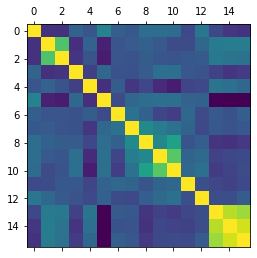

In [149]:
plt.matshow(corr_mat)
plt.show()

A partir da matriz de correlação já podemos identificar as variáveis que mais têm relação positiva com as notas em Matemática:
- Medu - grau de escolaridade da mãe
- Fedu - grau de escolaridade do pai
- studytime - tempo que o aluno dedica ao estudo por semana

Também podemos identificar quais variáveis mais têm relação negativa com as notas de Matemática:
- age - idade
- traveltime - tempo que o aluno gasta para ir de casa à escola
- failures - reprovações
- goout - sair com os amigos

#### Matriz de Correlação para a matéria de Português

In [161]:
corr_por = df_por.corr(method = 'pearson')
corr_por

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


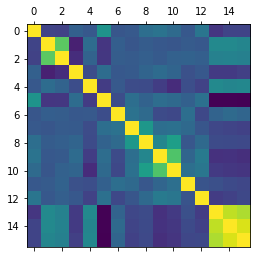

In [162]:
plt.matshow(corr_por)
plt.show()

Para a disciplina de Português, as variáveis que mais apresentam uma relação positiva com as notas são:
- Medu - grau de escolaridade da mãe
- Fedu - grau de escolaridade do pai
- studytime - tempo que o aluno dedica ao estudo por semana
- famrel - qualidade das relações familiares

As variáveis que mais apresentam relação negativa com as notas são:
- failures - reprovações
- Dalc - consumo de ácool durante dias da semana
- Walc - consumo de álcool nos fins de semana

Podemos ver que as variáveis numéricas que mais influenciam positiviamente ou negativamente as notas dos alunos variam para cada uma das disciplinas, mas em ambas a educação dos pais e o tempo de estudo aparecem como um fator positivo e a reporvação como um fator negativo.

Desta forma, podemos esperar que tais fatores citados se motrem também determinantes no que diz respeito as à média final quando avaliarmos o dataframe que considera ambas as disciplinas juntas.

#### Matriz de correlação considerando amabas as disciplinas

In [164]:
corr_df = df.corr()
corr_df

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_x,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_y,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
age,1.000000,-0.120663,-0.127846,0.102608,-0.012225,0.153033,0.025451,0.004882,0.159631,0.128371,0.152132,-0.063236,0.125972,-0.117486,-0.175370,-0.194589,0.106545,-0.012686,0.258573,0.029286,0.016797,0.166931,0.131928,0.156795,-0.066906,0.086303,-0.109549,-0.042010,-0.067977,-0.151499
Medu,-0.120663,1.000000,0.649797,-0.205895,0.050040,-0.230169,0.011913,0.035366,0.066870,0.043789,-0.013696,-0.041731,0.108560,0.229202,0.217918,0.205489,-0.210965,0.048303,-0.204947,0.007279,0.014831,0.046280,0.038862,-0.016006,-0.033347,0.023040,0.205381,0.215948,0.203554,0.249790
Fedu,-0.127846,0.649797,1.000000,-0.187856,-0.003824,-0.245386,0.013003,-0.007420,0.033179,0.017978,0.000928,0.015450,0.033602,0.215871,0.180042,0.155444,-0.192147,-0.004195,-0.212409,0.009061,-0.026150,0.013843,0.013747,0.000440,0.023192,0.020829,0.157978,0.184825,0.172009,0.207486
traveltime_mat,0.102608,-0.205895,-0.187856,1.000000,-0.101530,0.113276,-0.019759,-0.025226,0.029932,0.157260,0.140232,0.006005,-0.010382,-0.104305,-0.160859,-0.126004,0.986531,-0.096579,0.074348,-0.009415,-0.015065,0.050244,0.163880,0.137999,0.004489,0.020235,-0.186061,-0.183894,-0.153973,-0.173847
studytime_mat,-0.012225,0.050040,-0.003824,-0.101530,1.000000,-0.198990,0.039674,-0.131549,-0.053359,-0.186142,-0.245865,-0.078714,-0.073315,0.153626,0.129343,0.091339,-0.096666,0.978000,-0.198541,0.026456,-0.144890,-0.067147,-0.186246,-0.241411,-0.078421,-0.151648,0.247059,0.265147,0.272130,0.208530
failures_mat,0.153033,-0.230169,-0.245386,0.113276,-0.198990,1.000000,-0.067605,0.092117,0.125573,0.127504,0.142781,0.081661,0.017246,-0.394911,-0.384942,-0.380741,0.121427,-0.205772,0.499888,-0.065743,0.096531,0.136226,0.126314,0.147968,0.084741,0.187251,-0.306097,-0.369433,-0.383864,-0.438094
famrel_mat,0.025451,0.011913,0.013003,-0.019759,0.039674,-0.067605,1.000000,0.161720,0.079477,-0.090306,-0.123335,0.096206,-0.056267,0.029599,-0.010866,0.068603,-0.023474,0.033354,-0.031898,0.970334,0.128066,0.036950,-0.096531,-0.122828,0.087705,-0.052550,-0.011597,0.021321,0.045309,0.031669
freetime_mat,0.004882,0.035366,-0.007420,-0.025226,-0.131549,0.092117,0.161720,1.000000,0.294310,0.199967,0.134965,0.069842,-0.048814,0.010145,-0.014223,0.017604,-0.033523,-0.142405,0.062015,0.139959,0.974424,0.281091,0.193291,0.139365,0.070069,0.028592,-0.090973,-0.113247,-0.108958,-0.045601
goout_x,0.159631,0.066870,0.033179,0.029932,-0.053359,0.125573,0.079477,0.294310,1.000000,0.260664,0.417449,-0.027945,0.080057,-0.129491,-0.155863,-0.109654,0.032704,-0.062217,0.090001,0.049689,0.287391,0.936608,0.262964,0.400458,-0.044195,0.112995,-0.095997,-0.128927,-0.118224,-0.145303
Dalc_mat,0.128371,0.043789,0.017978,0.157260,-0.186142,0.127504,-0.090306,0.199967,0.260664,1.000000,0.647102,0.057706,0.148443,-0.080370,-0.050136,-0.044941,0.158594,-0.189511,0.175495,-0.089857,0.196331,0.265616,0.991651,0.649798,0.060654,0.146831,-0.233282,-0.256907,-0.264789,-0.158641


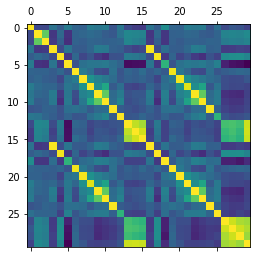

In [165]:
plt.matshow(corr_df)
plt.show()

Como a visualização dos dados é mais difícil para esse caso dada a quantidade de variáveis, podemos filtrar os dados positivos e negativos a partir da coluna das médias finais do gráfico de correlação.

Para filtrar os resultados positivos, inseriremos em uma lista os valores nomes das variáveis que apresentaram valores postivos na matriz de correlão com a média final:

In [177]:
# Criação de um array com o nome das colunas da matriz de correlação
colunas_matriz = np.array(corr_df.columns)
print(colunas_matriz)

['age' 'Medu' 'Fedu' 'traveltime_mat' 'studytime_mat' 'failures_mat'
 'famrel_mat' 'freetime_mat' 'goout_x' 'Dalc_mat' 'Walc_mat' 'health_mat'
 'absences_mat' 'G1_mat' 'G2_mat' 'G3_mat' 'traveltime_por'
 'studytime_por' 'failures_por' 'famrel_por' 'freetime_por' 'goout_y'
 'Dalc_por' 'Walc_por' 'health_por' 'absences_por' 'G1_por' 'G2_por'
 'G3_por' 'GF']


In [178]:
# Criação de um array com os coeficientes das variáveis associadas à media final
coeficientes_gf = np.array(corr_df['GF'])
print(coeficientes_gf)

[-0.15149881  0.24979015  0.20748617 -0.17384728  0.20852989 -0.43809433
  0.0316686  -0.04560068 -0.14530282 -0.15864055 -0.14199376 -0.13233069
 -0.05431021  0.88407015  0.89849024  0.87810448 -0.186138    0.2103016
 -0.25696919  0.01711264 -0.06646397 -0.15283129 -0.16069876 -0.14702524
 -0.13264665 -0.18837251  0.79250646  0.82989558  0.78560455  1.        ]


Cada coeficiente da matriz de coeficientes que se encontra no array de coeficientes está relacionado ao nome da sua variável no array de nomes das colunas pelo seu índice.

In [183]:
lista_positivos = [] # Lista para armazenas os nomes das variáveis que têm relação positiva com a média final
for i in range(len(coeficientes_gf)):
  if coeficientes_gf[i] > 0:
    lista_positivos.append(colunas_matriz[i])
print(lista_positivos)

['Medu', 'Fedu', 'studytime_mat', 'famrel_mat', 'G1_mat', 'G2_mat', 'G3_mat', 'studytime_por', 'famrel_por', 'G1_por', 'G2_por', 'G3_por', 'GF']


Temos, assim, a lista das variáveis numéricas que se correlacionam positivamente com a média final. Vale observar que as variáveis *G1_mat*, *G2_mat*, *G3_mat*, *G1_por*, *G2_por*, *G3_por*, e *GF* devem ser desconsideradas dessa relação porque não são os fatore externos que influenciam a média final, pelo contrário - são influenciados por eles. <br><br>
Também podemos reduzir *famrel_mat* e *famrel_por* a simplesmente uma variável, **famrel** pois ambas expressam a relação com os familiares e, de modo análogo, podemos reduzir *studytime_mat* e *studytime_por* a **studytime**.

Desta forma, temos que as variáveis numéricas que se relacionam positivamente com a média final são:
- Medu - grau de escolaridade da mãe
- Fedu - grau de escolaridade do pai
- studytime - tempo que se gasta estudando por semana
- famrel - relacionamento com a família